In [2]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
TEMPERATURES = [1]
SIMULATIONS = [2, 4]
TRIAL = 10

env1 = StatelessGym.make('CartPole-v1')
env2 = StatelessGym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

agent = MCTS.mcts_agent(horizon=30)

experiment1 = Experiment(env1, agent, temperatures=TEMPERATURES, simulations=SIMULATIONS, trial=TRIAL, experiment_name="Cartpole Base MCTS")

Simulation =  2 	Mean Cumulative Reward =  292.5 	Error =  38.40188797442126
Simulation =  4 	Mean Cumulative Reward =  322.2 	Error =  34.759113912756746
Temperature =  1  Results =  [292.5, 322.2]


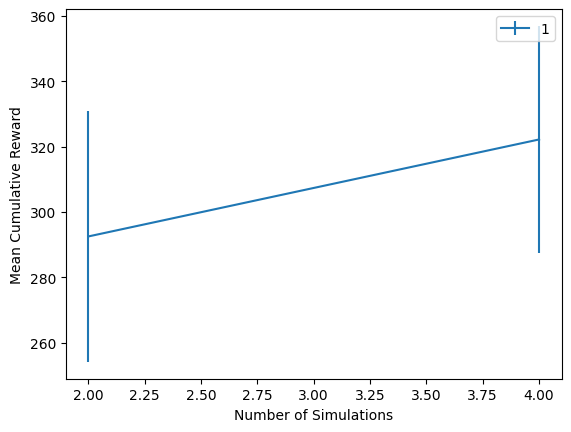

In [16]:
experiment1.run(save=True)
experiment1.show_results()

In [62]:
env = StatelessGym.make('CartPole-v1')
agent = MCTS.mcts_agent(horizon=-1)

rand_experiment = RandomExperiment(env, agent, simulations=[1, 16], temperature=1)
result = rand_experiment.run()
print(result)

ds = rand_experiment.create_dataset(5, "5_dataset")
print(ds)

[1, 13, 500.0]
[['Temperature', 'Simulations', 'Return'], [1, 6, 360.0], [1, 4, 352.0], [1, 15, 302.0], [1, 16, 326.0], [1, 7, 190.0]]


    Temperature  Simulations  Return
0             1            8   308.0
1             1            1     9.0
2             1            2   222.0
3             1           15   324.0
4             1            8   173.0
..          ...          ...     ...
95            1           14   466.0
96            1           15   251.0
97            1           15   271.0
98            1            4   158.0
99            1            1     9.0

[100 rows x 3 columns]
Simulations
1       9.583333
2     262.750000
3     275.666667
4     268.833333
5     322.875000
6     324.666667
7     381.142857
8     364.333333
9     300.500000
10    406.200000
11    271.000000
12    364.400000
13    361.000000
14    440.500000
15    287.400000
16    388.000000
Name: Return, dtype: float64
<PandasArray>
[0.5149286505444373,  96.94457179233915, 105.12056570116683,
  120.3319021152191,   156.776854614631, 142.17547842953323,
 114.61155929403249, 155.16786608917025, 105.97310979677816,
  102.4779651112049, 1

<ErrorbarContainer object of 3 artists>

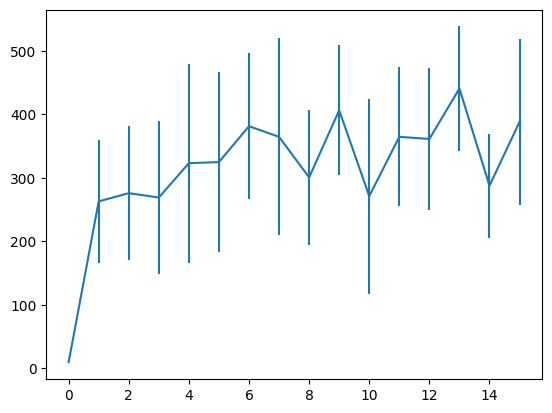

In [61]:
df = pd.read_csv('../datasets/1-100_dataset.csv')
print(df)

group_simulation = df.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

plt.errorbar(list(range(len(group_simulation))),  mean_returns, yerr=std_returns.array)

In [16]:
dataset_name = "Cluster_%d_1-16_1000-t500-Cartpole.csv"
dataset = pd.DataFrame()

for i in range(1, 11):
    dataset = dataset.append(pd.read_csv('../datasets/' + dataset_name % i), ignore_index=True)
    
print(dataset)

      Temperature  Simulations  Return
0             500            5   223.0
1             500           13   500.0
2             500           12   423.0
3             500            3    68.0
4             500            8   162.0
...           ...          ...     ...
9995          500           13   500.0
9996          500           12   500.0
9997          500           14   210.0
9998          500            5   500.0
9999          500            6   348.0

[10000 rows x 3 columns]


In [33]:
directory = "../datasets/1000_s1-100_t500_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
print(dataset)

      Temperature  Simulations  Return
0             500            6   500.0
1             500           93   329.0
2             500           92   330.0
3             500            1     9.0
4             500            9   500.0
...           ...          ...     ...
9995          500           48   230.0
9996          500           28   500.0
9997          500           81   313.0
9998          500           37   470.0
9999          500           95   358.0

[10000 rows x 3 columns]


      Temperature  Simulations  Return
0             500            6   500.0
1             500           93   329.0
2             500           92   330.0
3             500            1     9.0
4             500            9   500.0
...           ...          ...     ...
9995          500           48   230.0
9996          500           28   500.0
9997          500           81   313.0
9998          500           37   470.0
9999          500           95   358.0

[10000 rows x 3 columns]


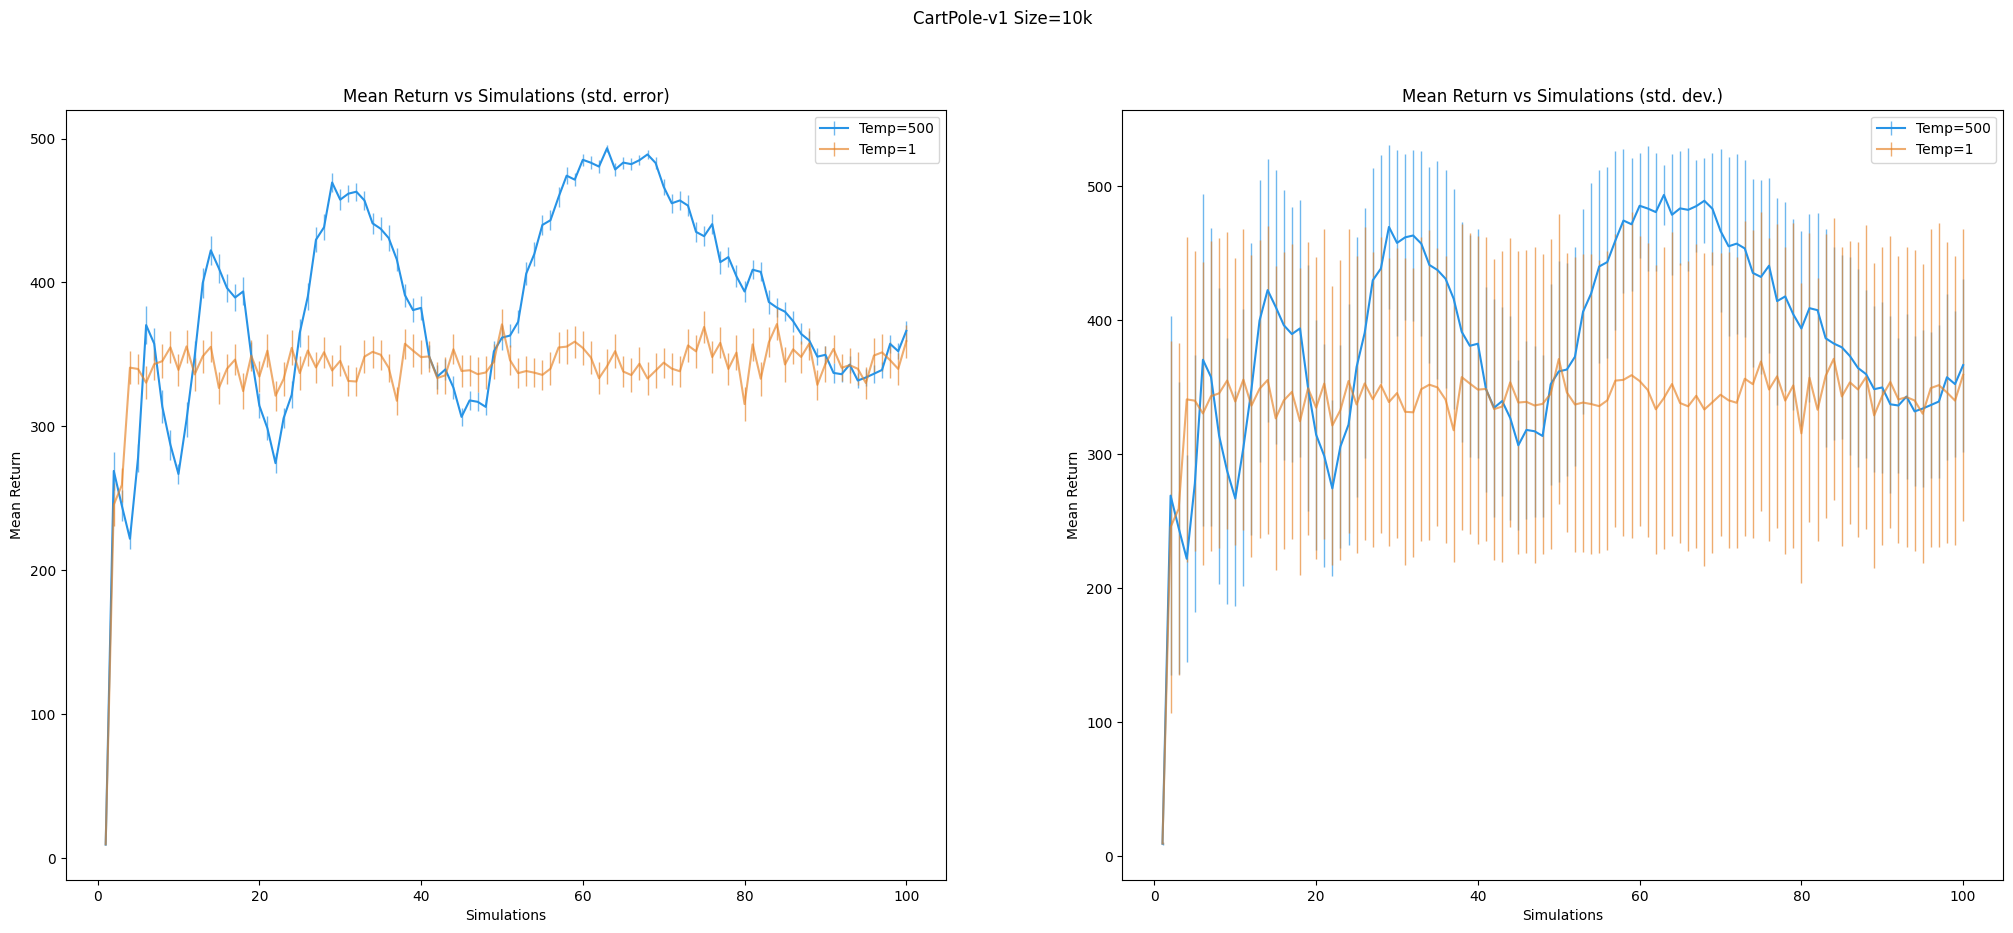

In [55]:
directory = "../datasets/1000_s1-100_t500_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
print(dataset)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)


#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)
#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('CartPole-v1 Size=10k')
fig.set_size_inches(25, 10)

ax1.set_title("Mean Return vs Simulations (std. error)")
ax2.set_title("Mean Return vs Simulations (std. dev.)")
ax1.xaxis.set_label_text("Simulations")
ax1.yaxis.set_label_text("Mean Return")
ax2.xaxis.set_label_text("Simulations")
ax2.yaxis.set_label_text("Mean Return")

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

directory = "../datasets/1000_s1-100_t1_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

ax1.legend()
ax2.legend()

In [41]:
directory = "../datasets/1000_s1-100_t1_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

d:\TU Delft\YEAR 2\MCTS_Time_Management\.conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


# Histogram for a specific simulation number

In [63]:
directory = "../datasets/10k/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

count    3061.000000
mean      251.136557
std       128.201946
min        11.000000
25%       162.000000
50%       224.000000
75%       331.000000
max       500.000000
Name: Return, dtype: float64
count    3141.000000
mean      222.548870
std        79.837749
min        33.000000
25%       167.000000
50%       200.000000
75%       256.000000
max       500.000000
Name: Return, dtype: float64
count    3084.000000
mean      289.584955
std       105.606302
min        51.000000
25%       207.000000
50%       262.000000
75%       351.000000
max       500.000000
Name: Return, dtype: float64
count    3156.000000
mean      363.096324
std       115.559167
min       126.000000
25%       258.000000
50%       358.000000
75%       500.000000
max       500.000000
Name: Return, dtype: float64
count    3105.000000
mean      364.846055
std       115.470918
min       122.000000
25%       261.000000
50%       362.000000
75%       500.000000
max       500.000000
Name: Return, dtype: float64
count    3163.0

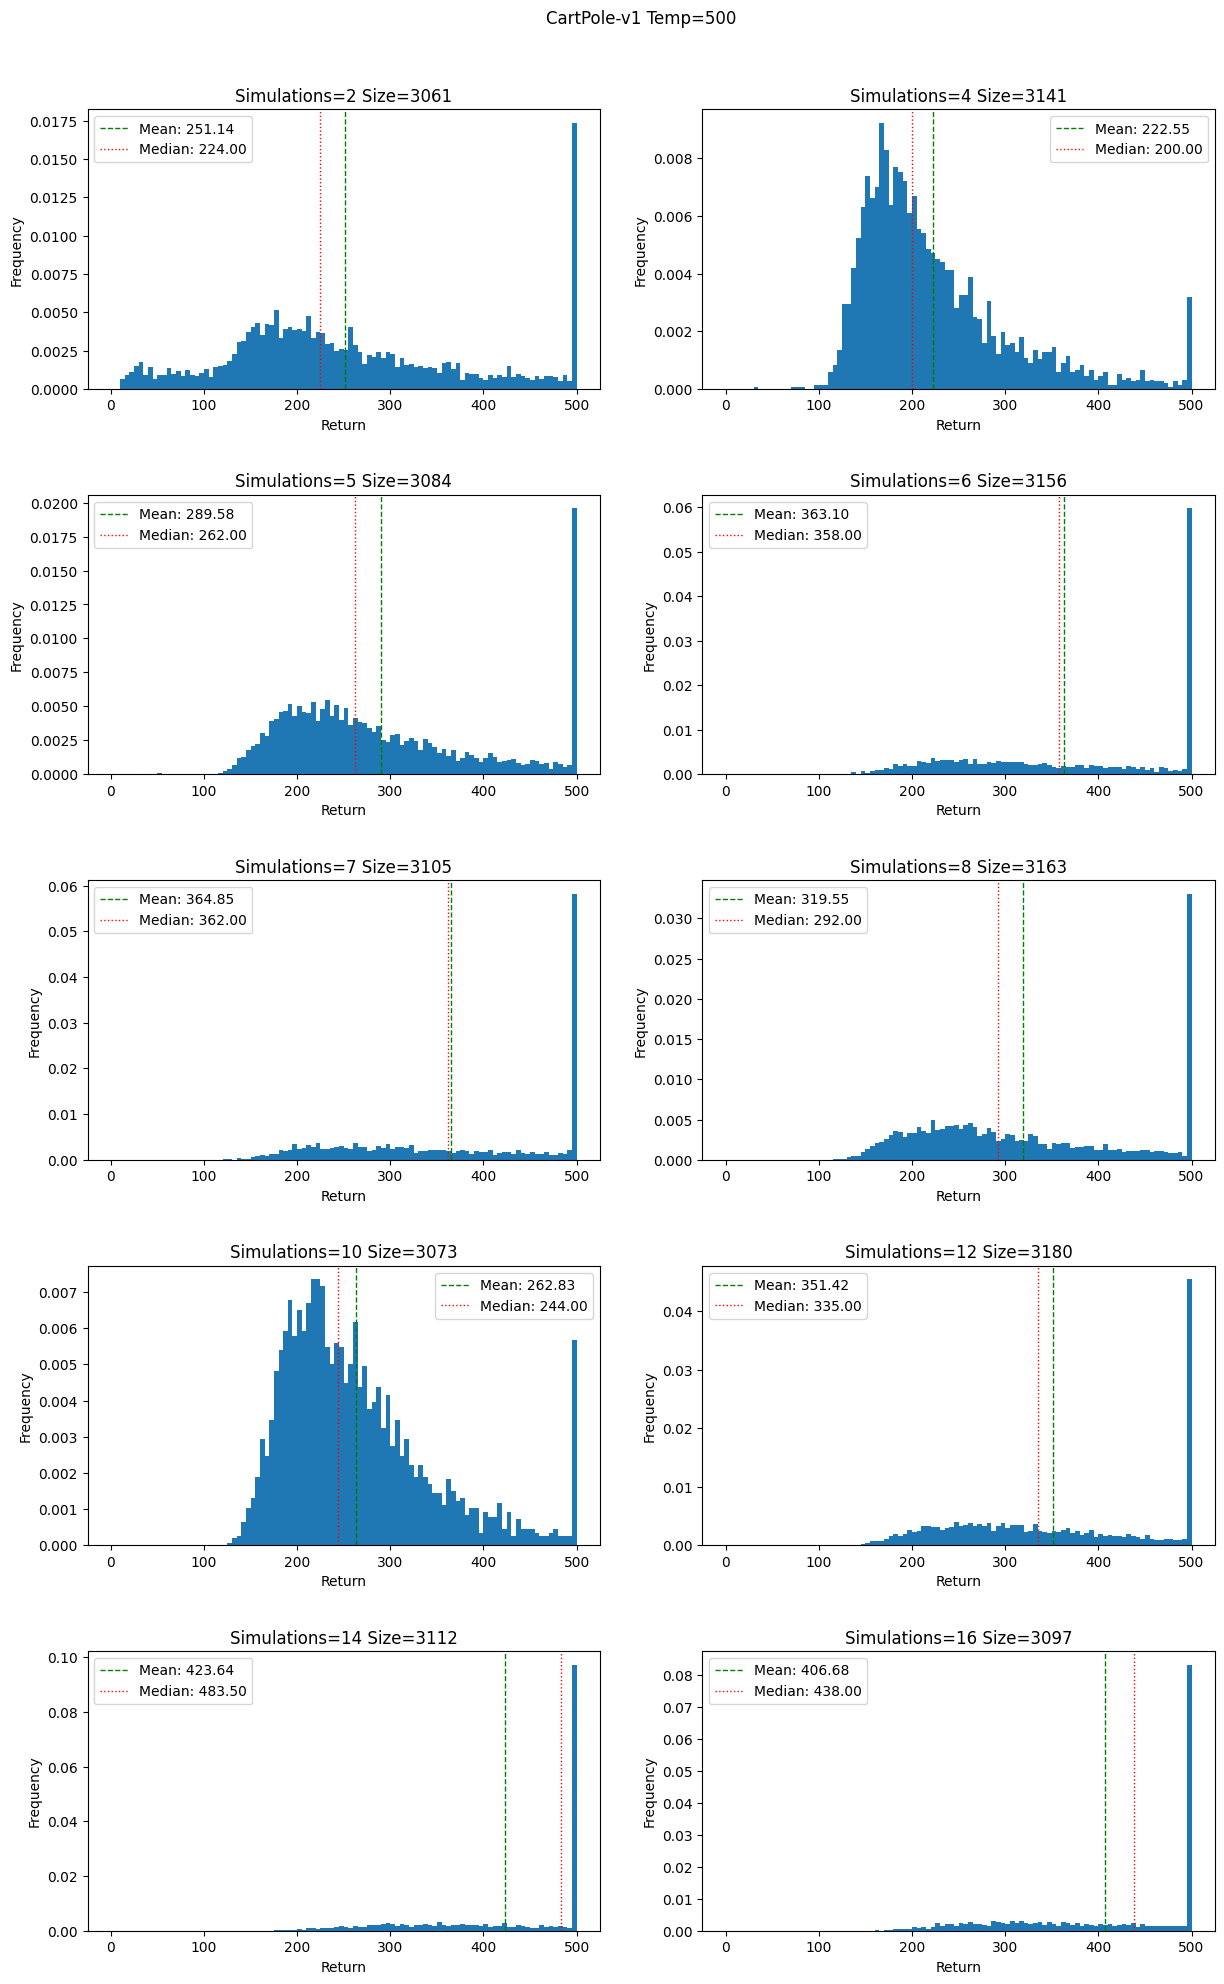

In [106]:
sims = [2, 4, 5, 6, 7, 8, 10, 12, 14, 16]
bins = 100
fig, axes = plt.subplots(len(sims) // 2 + len(sims) % 2, 2)
fig.suptitle('CartPole-v1 Temp=500')
fig.set_size_inches(12, 4 * (len(sims) // 2))
fig.tight_layout()
fig.subplots_adjust(wspace=0.2,
                    hspace=0.38,
                    top=0.93)

for i in range(len(sims)):
    print(group_simulation["Return"].get_group(sims[i]).describe())
    current_ax = axes[i // 2][i % 2]
    return_group = group_simulation["Return"].get_group(sims[i])
    current_ax.hist(return_group, bins=bins, density=True, range=[0, 500])
    current_ax.axvline(return_group.mean(), color="green", linestyle='dashed', linewidth=1, label = "Mean: %.2f" % return_group.mean())
    current_ax.axvline(return_group.median(), color="red", linestyle='dotted', linewidth=1, label = "Median: %.2f" % return_group.median())
    
    current_ax.set_title("Simulations=%d Size=%d" % (sims[i], len(return_group)))
    current_ax.xaxis.set_label_text("Return")
    current_ax.yaxis.set_label_text("Frequency")
    current_ax.legend()


In [66]:
print(list(group_simulation.indices.keys()))
print(mean_returns)
print(group_simulation["Return"].count())
print(error_returns.array)

[2, 5, 6, 8, 9, 10, 11, 13, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 45, 46, 49, 52, 54, 55, 56, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 84, 86, 93, 98, 99]
Simulations
2     156.500000
5     229.500000
6     500.000000
8     248.000000
9     319.250000
10    280.500000
11    285.000000
13    426.000000
15    390.000000
18    500.000000
19    245.000000
22    171.000000
23    352.000000
24    253.000000
25    352.666667
26    500.000000
27    500.000000
28    339.000000
29    364.000000
30    500.000000
31    500.000000
32    392.500000
33    288.000000
36    261.000000
37    500.000000
38    327.000000
39    376.333333
40    421.000000
41    349.000000
43    243.000000
45    227.000000
46    305.000000
49    308.000000
52    329.000000
54    500.000000
55    410.666667
56    410.250000
61    425.000000
62    500.000000
63    460.000000
65    500.000000
68    495.500000
69    500.000000
70    448.000000
71    50

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [23]:
X = dataset['Simulations'].values.reshape(-1, 1)
y = dataset['Return'].values

In [25]:
print(X)
print(y)

[[ 5]
 [13]
 [12]
 ...
 [14]
 [ 5]
 [ 6]]
[223. 500. 423. ... 210. 500. 348.]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error

linear_mse = mean_squared_error(y_test, linear_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)

print("Linear Regression MSE:", linear_mse)
print("Decision Tree Regression MSE:", tree_mse)
print("Random Forest Regression MSE:", forest_mse)


Linear Regression MSE: 14218.481127296827
Decision Tree Regression MSE: 10363.880789647957
Random Forest Regression MSE: 10366.836610537892


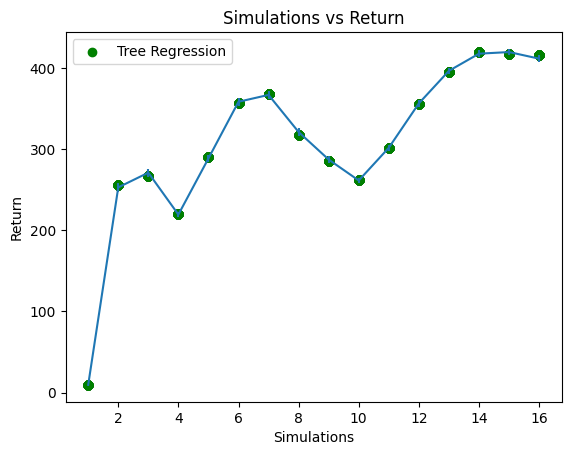

In [49]:
plt.errorbar(list(range(1, len(group_simulation) + 1)),  mean_returns, yerr=error_returns.array)
#plt.plot(X_test, linear_predictions, linewidth=2, color='red', label='Linear Regression')
plt.scatter(X_test, tree_predictions, color='green', label='Tree Regression')
#plt.scatter(X_test, forest_predictions, color='red', label='Forest Regression')


plt.xlabel('Simulations')
plt.ylabel('Return')
plt.title('Simulations vs Return')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(30, 30))
plot_tree(tree_model, feature_names=['Simulation'], filled=True)
plt.title('Decision Tree Regression')
plt.show()
